In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
#
%matplotlib inline 

In [2]:
insurance = pd.read_csv('../Dataset/Medical Insurance/insurance.csv')

In [7]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
insurance.info()

### Exploratory Data Analysis

**Relationship between features**

<Axes: xlabel='bmi_category', ylabel='charges'>

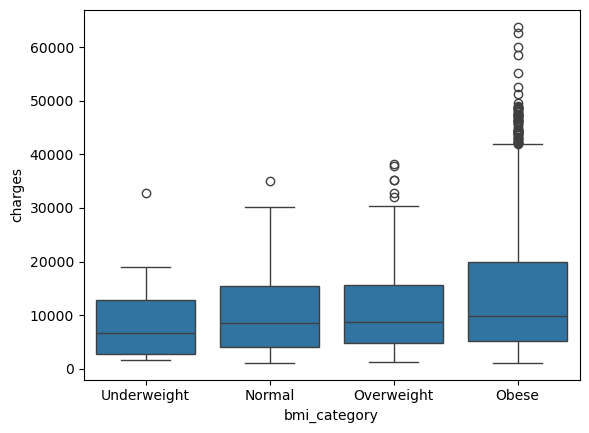

In [175]:
sns.boxplot(data=insurance, x='bmi_category', y='charges')

In [ ]:
# since children is a range from (0-5) would we treat is a categorical column and buketrize it 
# are people of older age an have more children have higher charge (check using groupby)
# also use groupbys to chekc relationship between bmi, age and charges 

# bin the bmi into classes like overweigh and check the..
# relationship between bmi_classes, sex and charges
# 
# relationship between children and other features 
# 
# bin the bmi into underweight, normal e.t.c using threshold and feature like age 

<Axes: xlabel='age_group', ylabel='charges'>

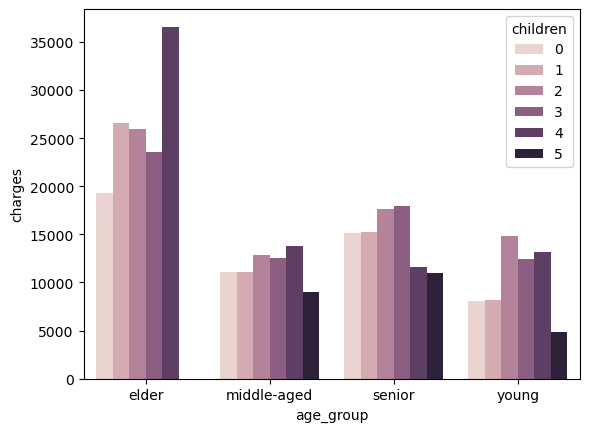

In [22]:
# insurance.head()
child = insurance.groupby(['children','age_group'])['charges'].mean().reset_index()
sns.barplot(data=child, x='age_group', y='charges', hue='children')

<Axes: xlabel='children', ylabel='charges'>

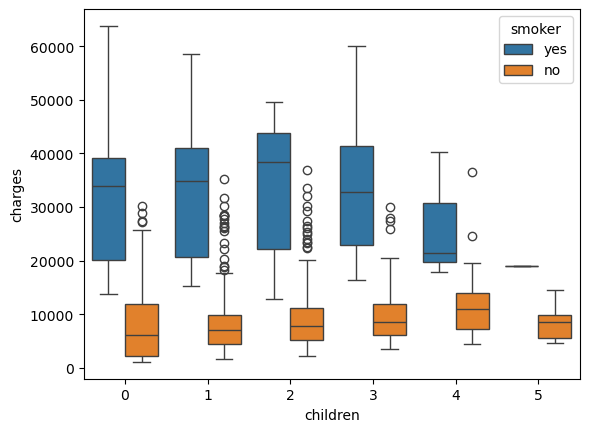

In [ ]:
sns.boxplot(data=insurance, x='children', y='charges', hue='smoker')

In [3]:
bins = [0, 18.5, 24.9, 29.9, float('inf')]
labels = ['Underweight', 'Normal', 'Overweight', 'Obese']

insurance['bmi_category'] = pd.cut(insurance['bmi'], bins=bins, labels=labels)

print(insurance['bmi_category'].value_counts())

bmi_category
Obese          716
Overweight     380
Normal         221
Underweight     21
Name: count, dtype: int64


In [4]:
bmi_smoker =  insurance.groupby(['bmi_category','smoker'])['charges'].mean().reset_index()
bmi_smoker

C:\Users\FJ01\AppData\Local\Temp\ipykernel_9964\31081494.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bmi_smoker =  insurance.groupby(['bmi_category','smoker'])['charges'].mean().reset_index()


,bmi_category,smoker,charges
0,Underweight,no,5485.056800
1,Underweight,yes,18809.824980
2,Normal,no,7616.208985
3,Normal,yes,19942.223641
4,Overweight,no,8348.367998
5,Overweight,yes,22379.034063
6,Obese,no,8809.545659
7,Obese,yes,41355.869131


<Axes: xlabel='smoker', ylabel='charges'>

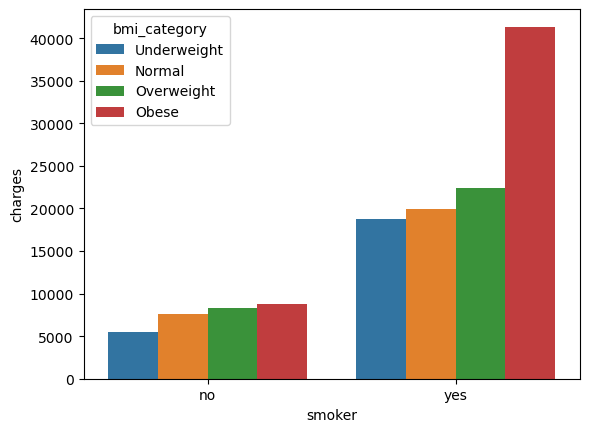

In [5]:
sns.barplot(data=bmi_smoker, x='smoker', y='charges', hue='bmi_category')

In [6]:
bmi_sex = insurance.groupby(['bmi_category','sex'])['charges'].mean().reset_index()
bmi_sex

C:\Users\FJ01\AppData\Local\Temp\ipykernel_9964\621042054.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bmi_sex = insurance.groupby(['bmi_category','sex'])['charges'].mean().reset_index()


,bmi_category,sex,charges
0,Underweight,female,10532.029435
1,Underweight,male,5611.706381
2,Normal,female,10987.580283
3,Normal,male,9772.747038
4,Overweight,female,10660.361642
5,Overweight,male,11360.629578
6,Obese,female,14250.829369
7,Obese,male,16626.097857


<Axes: xlabel='sex', ylabel='charges'>

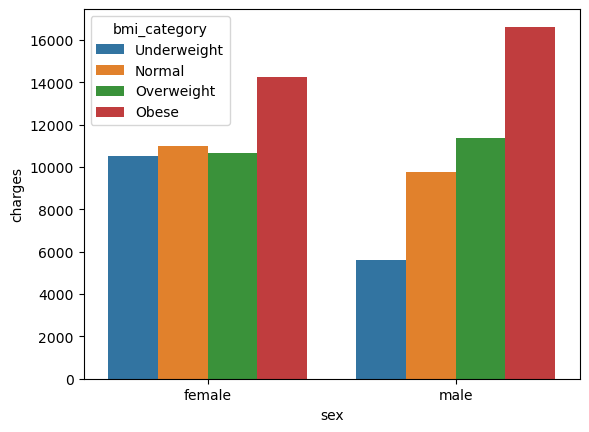

In [152]:
sns.barplot(data=bmi_sex, x='sex', y='charges', hue='bmi_category')

<Axes: xlabel='bmi_age', ylabel='charges'>

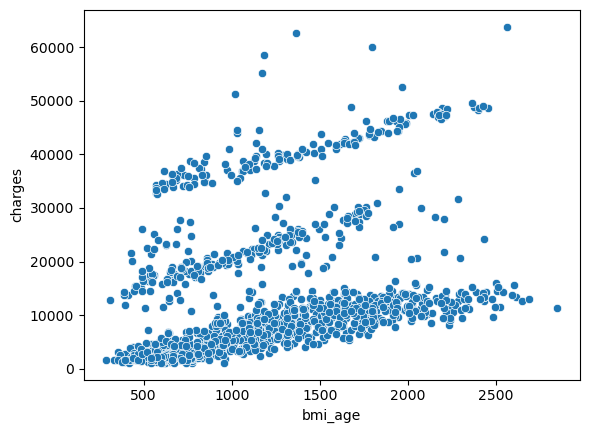

In [11]:
df = insurance.copy()

df['bmi_age'] = df['age'] * df['bmi']

sns.scatterplot(data=df, x='bmi_age', y='charges')

In [14]:
df[['charges','bmi_age','age_poly']].corr()

,charges,bmi_age,age_poly
charges,1.000000,0.334754,0.297167
bmi_age,0.334754,1.000000,0.852818
age_poly,0.297167,0.852818,1.000000


<Axes: xlabel='age_poly', ylabel='charges'>

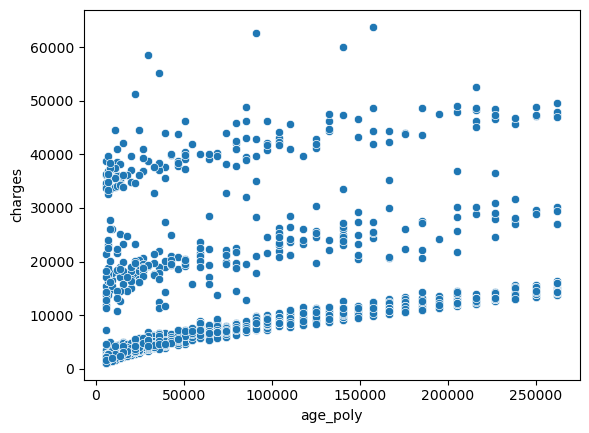

In [13]:
df['age_poly'] = df['age']**3

sns.scatterplot(data=df, x='age_poly', y='charges')

In [170]:
df[['age','charges','bmi','bmi_age','age_poly']].corr()

,age,charges,bmi,bmi_age,age_poly
age,1.000000,0.299008,0.109272,0.879840,0.959865
charges,0.299008,1.000000,0.198341,0.334754,0.297167
bmi,0.109272,0.198341,1.000000,0.539637,0.113443
bmi_age,0.879840,0.334754,0.539637,1.000000,0.852818
age_poly,0.959865,0.297167,0.113443,0.852818,1.000000


In [15]:
# grouping by bmi, age and charges 
bmi_age = insurance.groupby(['bmi','age'])['charges'].mean().reset_index()
bmi_age['age_group'] = pd.cut(bmi_age['age'], bins=range(15, 70, 5))
bmi_age.head()

,bmi,age,charges,age_group
0,15.960,18,1694.79640,"(15, 20]"
1,16.815,21,3167.45585,"(20, 25]"
2,16.815,38,6640.54485,"(35, 40]"
3,17.195,26,14455.64405,"(25, 30]"
4,17.290,18,12829.45510,"(15, 20]"


<Axes: xlabel='age', ylabel='charges'>

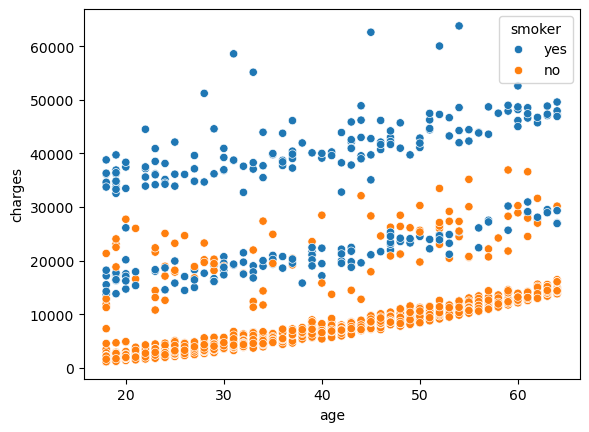

In [134]:
sns.scatterplot(data=insurance, x='age', y='charges', hue='smoker')

In [66]:
insurance[['age','charges','bmi','children']].corr()

,age,charges,bmi,children
age,1.000000,0.299008,0.109272,0.042469
charges,0.299008,1.000000,0.198341,0.067998
bmi,0.109272,0.198341,1.000000,0.012759
children,0.042469,0.067998,0.012759,1.000000


In [17]:
insurance.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'bmi_category'],
      dtype='object')

In [6]:
numerical_cols = ['age','bmi', 'charges']
categorical_cols = ['sex', 'smoker', 'region','children']

**Check the distribution of numerical columns**

In [ ]:
for col in numerical_cols:
    sns.histplot(data=insurance, x=col)
    plt.tight_layout()
    plt.title(f'distribution of {col}')
    plt.show()

**Check for distrbution of Categorical columns**

In [ ]:
for cols in categorical_cols:
    sns.countplot(data=insurance, x=cols)
    plt.tight_layout()
    plt.title(f'distribution of {cols}')
    plt.show()

**Relationship between numerical columns and target**

In [ ]:
for col in ['age','bmi']:
    sns.regplot(data=insurance, x=col, y='charges')
    plt.show()

In [ ]:
sns.boxplot(data=insurance, x='children', y='charges')

**Relationship between categorical features and target**

In [ ]:
for col in categorical_cols:
    sns.boxplot(data=insurance, x=col, y='charges', palette='Set1')
    plt.tight_layout()
    plt.show()


In [7]:
insurance.groupby(['bmi','age'])['charges'].mean()

bmi     age
15.960  18      1694.79640
16.815  21      3167.45585
        38      6640.54485
17.195  26     14455.64405
17.290  18     12829.45510
                  ...     
48.070  46      9432.92530
49.060  58     11381.32540
50.380  23      2438.05520
52.580  22     44501.39820
53.130  18      1163.46270
Name: charges, Length: 1295, dtype: float64

In [ ]:
for col in numerical_cols:
    sns.regplot(data=insurance, x=col, y='charges')
    plt.tight_layout()
    plt.show()

### Setting a Baseline Estimate 

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, root_mean_squared_error

train_target, test_target = train_test_split(insurance['charges'], test_size=0.2, random_state=42)

mean_train_target = train_target.mean()

In [9]:
# print(mean_train_target)

length = len(test_target)

baseline_pred = np.full(shape=length, fill_value= mean_train_target) # this creates an np series of the mean_train_target
# the np.full essentiall just copies the values of mean_train_target and create a series of shape

baseline_mae = mean_absolute_error(test_target, baseline_pred)
baseline_r2 = r2_score(test_target, baseline_pred)
baseline_rmse = root_mean_squared_error(test_target, baseline_pred)

print(f'Baseline MAE: {baseline_mae}')
print(f'Baseline R2: {baseline_r2}')
print(f'Baseline RMSE: {baseline_rmse}')

Baseline MAE: 9593.33846086229
Baseline R2: -0.0009192486886582252
Baseline RMSE: 12465.610441715768


### Feature Engineering 

In [ ]:
# 1  from my EDA my features distribution of numerical colums are okay so no feature engineering transformation on them

# 2. categorical distribution is okay but since there are more non-smokers than smokers:
#    we can use a hyperparamers in the XGboost model

# 3. From EDA we observe that relationship between num_col and target is linear and the have little correlation
#    we'll try and combine some features to the num_col to see if it imporove the relationship between it and target
#    something like weight class which shows significant relationship 

# 4. We classified bmi into categories based on a range
#      we then checked bmi_categories vs sex, smokers and the barplot provided a better relationship btw then 2 and the charges

# 5. features i'll be using cause they are predictive [age, sex, bmi, bmi_categories, region, smokers,children]

# 6. i did a bmi_age combination and then check the relationship between it and the target
#    it had a linear relationship and the corr was higher than each of them indvidually with the target
#    the bmi_smoker has even better correlation
#    would be using both of them


In [10]:
# bmi category column
bins = [0, 18.5, 24.9, 29.9, float('inf')]
labels = ['Underweight', 'Normal', 'Overweight', 'Obese']

insurance['bmi_category'] = pd.cut(insurance['bmi'], bins=bins, labels=labels)

In [11]:
# another way to do create a category though the dtype would be object not category
def age_bucket(age):
    if age < 25:
        return 'young'
    elif age < 45:
        return 'middle-aged'
    elif age < 60:
        return 'senior'
    else:
        return 'elder'

insurance['age_group'] = insurance['age'].apply(age_bucket)


In [20]:
insurance.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'bmi_category', 'age_group'],
      dtype='object')

In [12]:
insurance['bmi_age'] = insurance['age'] * insurance['bmi']
insurance['bmi_smoker'] = insurance['bmi'] * insurance['smoker'].map({'yes': 1, 'no': 0})

insurance[['age','bmi', 'bmi_age','bmi_smoker', 'charges']].corr()

,age,bmi,bmi_age,bmi_smoker,charges
age,1.000000,0.109272,0.879840,-0.018383,0.299008
bmi,0.109272,1.000000,0.539637,0.108741,0.198341
bmi_age,0.879840,0.539637,1.000000,0.028517,0.334754
bmi_smoker,-0.018383,0.108741,0.028517,1.000000,0.845120
charges,0.299008,0.198341,0.334754,0.845120,1.000000


### Preprocessing 

In [13]:
df = insurance.copy()
# i don't eant to lose the insurance dataset 

In [14]:
from sklearn.model_selection import train_test_split
y = df.pop('charges')
X = df
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [27]:
insurance.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'bmi_category', 'age_group', 'bmi_age', 'bmi_smoker'],
      dtype='object')

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder, OrdinalEncoder

num_col = ['age','bmi', 'children','bmi_age', 'bmi_smoker']
cat_col = ['sex', 'smoker', 'region','age_group', 'bmi_category']

num_pipeline = Pipeline(steps=[
    ('scale',StandardScaler())
]
)

cat_pipeline_tree = Pipeline(
    steps=[
        ('Ordinal Encoding', OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-1))
    ]
)

cat_pipeline_line = Pipeline(
    steps=[
        ('One-hot encoding', OneHotEncoder(handle_unknown='ignore',sparse_output=False))
    ]
)

In [16]:
from sklearn.compose import ColumnTransformer

preprocessing_tree = ColumnTransformer(
    transformers=[
        ('num_pipeline', num_pipeline, num_col),
        ('cat_pipeline_tree', cat_pipeline_tree, cat_col)
    ],
    remainder='drop',
    n_jobs=-1
)

preprocessing_line = ColumnTransformer(
    transformers=[
        ('num_pipeline', num_pipeline, num_col),
        ('cat_pipeline_line', cat_pipeline_line, cat_col)
    ],
    remainder='drop',
    n_jobs= -1
)

In [17]:
from xgboost import XGBRFRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [18]:
models = [
(
    'Ridge',
    Ridge(),
    {'Ridge__alpha': [0.01, 0.1, 1.0, 10.0],
     'Ridge__solver': ['auto', 'svd', 'cholesky', 'lsqr']},
    (X_train, y_train),
    (X_test, y_test),
    preprocessing_line
),
(
    'RF',
    RandomForestRegressor(),
    {'RF__n_estimators': [50, 100, 200, 300], # specifying the parameter as such is better and runs without errors
     'RF__max_depth': [None, 10, 20, 30],
     },
    (X_train, y_train),
    (X_test, y_test),
    preprocessing_tree
),
(
    'xgb',
    XGBRFRegressor(),
    {'xgb__n_estimators': [50, 100, 200, 300], 
     'xgb__max_depth': [3, 5, 7, 10],
     'xgb__learning_rate': [0.01, 0.05, 0.1, 0.3],
     },
    (X_train, y_train),
    (X_test, y_test),
    preprocessing_tree
),
(
    'SVR',
    SVR(),
    {'SVR__kernel': ['linear', 'rbf'],
     'SVR__C': [0.1, 1, 10, 100],
     },
    (X_train, y_train),
    (X_test, y_test),
    preprocessing_line
)
]

### Hyperparameter Tuning and Model Training 

In [19]:
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, r2_score, mean_absolute_error, root_mean_squared_error, accuracy_score
from sklearn.model_selection import RandomizedSearchCV
import joblib


importances_list = []
reports = []
metrics = {}
for mod in models:

    name, model, param, train_set, test_set, preprocessing = mod
    x_train1 = train_set[0]
    y_train1 = train_set[1]
    x_test1 = test_set[0]
    y_test1 = test_set[1]

    pipe = Pipeline(
        steps=[('preprocessing',preprocessing),
            (name,model)
            ]
    )
    random_search = RandomizedSearchCV(
        estimator= pipe,
        param_distributions= param,
        n_iter= 10,
        scoring= 'neg_mean_absolute_error',
        cv= 5,
        random_state= 42,
        verbose= 1,
        n_jobs= -1 
    )

    joblib.dump(pipe,f'pipeline for {name}.joblib')

    random_search.fit(x_train1,y_train1)
    best_model = random_search.best_estimator_
    
    best_model.fit(x_train1,y_train1)
    y_pred = best_model.predict(x_test1)

    #Evaluation
    mae = mean_absolute_error(y_test1,y_pred)
    r2 = r2_score(y_test1, y_pred)
    rmse = root_mean_squared_error(y_test1, y_pred)

    metrics = {
        'mean_average_error': mae,
        'r2 score': r2,
        'root_mean_squared_error': rmse
        }
    
    parameters = random_search.best_params_


    reports.append({
        'model_name': name,
        'metrics': metrics,
        'params': parameters,
        'model': best_model
    })


joblib.dump(reports, 'report.joblib')

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits


c:\Users\FJ01\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 8 candidates, totalling 40 fits


['report.joblib']

### Model Experiment and Tracking 

In [20]:
import mlflow 
import mlflow.sklearn
import mlflow.xgboost

In [21]:
import dagshub
dagshub.init(repo_owner='jerremiahwilly', repo_name='Medical-Insurance', mlflow=True)

Accessing as jerremiahwilly

Initialized MLflow to track repo "jerremiahwilly/Medical-Insurance"

Repository jerremiahwilly/Medical-Insurance initialized!

In [52]:
reports[0]['model']

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('num_pipeline',
                                                  Pipeline(steps=[('scale',
                                                                   StandardScaler())]),
                                                  ['age', 'bmi', 'children',
                                                   'bmi_age', 'bmi_smoker']),
                                                 ('cat_pipeline_line',
                                                  Pipeline(steps=[('One-hot '
                                                                   'encoding',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['sex', 'smoker', 'region',
                                                   'age_group',
                                                   'bmi_category'])])),
                ('Ridge', Ridge(alpha=0.1, solver='svd'))])

In [53]:
import os
os.environ['MLFLOW_TRACKING_USERNAME'] = 'jerremiahwilly'
os.environ['MLFLOW_TRACKING_PASSWORD'] = '6bf1a4070c641409d85a62e55a66ae963eaaf4d5'
os.environ['MLFLOW_TRACKING_URI'] = 'https://dagshub.com/jerremiahwilly/Medical-Insurance.mlflow'

mlflow.set_tracking_uri(os.environ["MLFLOW_TRACKING_URI"])

mlflow.set_experiment('Medical Insurance1')  # The name of the Project
# mlflow.set_tracking_uri('http://127.0.0.1:5000')


for model_report in reports:
    with mlflow.start_run(run_name=model_report['model_name']):

        mlflow.set_tag("model_name", model_report["model_name"]) # adds metadata tages to model 
        
        for p, v in model_report["params"].items():
            mlflow.log_param(p, v) # saves the hyperparameters used

        for m, v in model_report["metrics"].items():
            mlflow.log_metric(m, v) #save the metrics

        mlflow.log_param('Model name', model_report['model_name']) # a good pratice, usefull when trying to compare 



        mlflow.sklearn.log_model(
        sk_model=model_report['model'],
        name= model_report['model_name'],
        input_example=X_train,
        registered_model_name= f"sk-learn-{name}-reg-model",
    )

        # # Save with joblib (often better for sklearn models)
        # model_path = "model.joblib"
        # joblib.dump(model_report['model'], model_path)

        # # Log as artifact
        # mlflow.log_artifact(model_path, "model")

        # mlflow.sklearn.log_model(model_report['model']) #saves the model 

🏃 View run Ridge at: https://dagshub.com/jerremiahwilly/Medical-Insurance.mlflow/#/experiments/1/runs/811bdf02bdb04de4a618c3d2db2482fd
🧪 View experiment at: https://dagshub.com/jerremiahwilly/Medical-Insurance.mlflow/#/experiments/1


RestException: INTERNAL_ERROR: Response: {'error': 'unsupported endpoint, please contact support@dagshub.com'}

In [47]:
# Registering the model for model versioning 
model_name = 'RandomForest Model'
run_id = input('Enter Run ID')

model_uri = f'run:/{run_id}/{model_name}'

result = mlflow.register_model(model_uri, model_name)  # my prefered choice based on the metrics 

Successfully registered model 'RandomForest Model'.
2025/08/01 08:49:32 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: RandomForest Model, version 1
Created version '1' of model 'RandomForest Model'.


In [ ]:
import mlflow.sklearn

model_name = "RandomForest Model"
model_version = 'latest'

load_uri = f"models:/{model_name}/{model_version}"

# loaded_model = mlflow.sklearn.load_model(load_uri)
loaded_ml = mlflow.sklearn.load_model(load_uri)


In [ ]:
joblib.dump(loaded_ml, 'Best_model.joblib')

In [50]:
from mlflow.tracking import MlflowClient

client = MlflowClient()
client.list_artifacts(run_id)


[<FileInfo: file_size=None, is_dir=True, path='model'>]

### Comparing the bes to the baseline model